# **CASE 007: PIB Per Capita** <p>
Dados da renda per capita dos estados da união <p>

link oficial dos dados: http://www.atlasbrasil.org.br/ <p>

**PIB per capita** é um dos indicadores socioeconômicos que avaliam o grau de desenvolvimento econômico de um determinado lugar. A média é obtida através da divisão do Produto Nacional Bruto (PNB) pelo número total de habitantes.

**Base de Dados para Download** <p>
[Download no Driver](https://docs.google.com/spreadsheets/d/1ieIQN3UjtkYwayuAusZAgvBdR-SXlL1L/edit?usp=sharing&ouid=101707831224147120634&rtpof=true&sd=true)

In [1]:
!pip install seaborn
!pip install openpyxl

     |████████████████████████████████| 292 kB 4.4 MB/s            
     |████████████████████████████████| 242 kB 4.3 MB/s            


In [2]:
# Bibliotecas
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Lendo a base de dados
Base_Dados = pd.read_excel('Dados_Pib.xlsx', engine='openpyxl')

Base_Dados = Base_Dados[['Territorialidades', 'Ano', 'PIB per capita']]

# Verificando
Base_Dados.head(10)

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
5,Bahia,2013,11.40
6,Ceará,2013,10.40
7,Distrito Federal,2013,52.77
8,Espírito Santo,2013,25.56
9,Goiás,2013,19.68


In [4]:
Base_Dados.groupby( by=['Territorialidades', 'Ano'] ).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

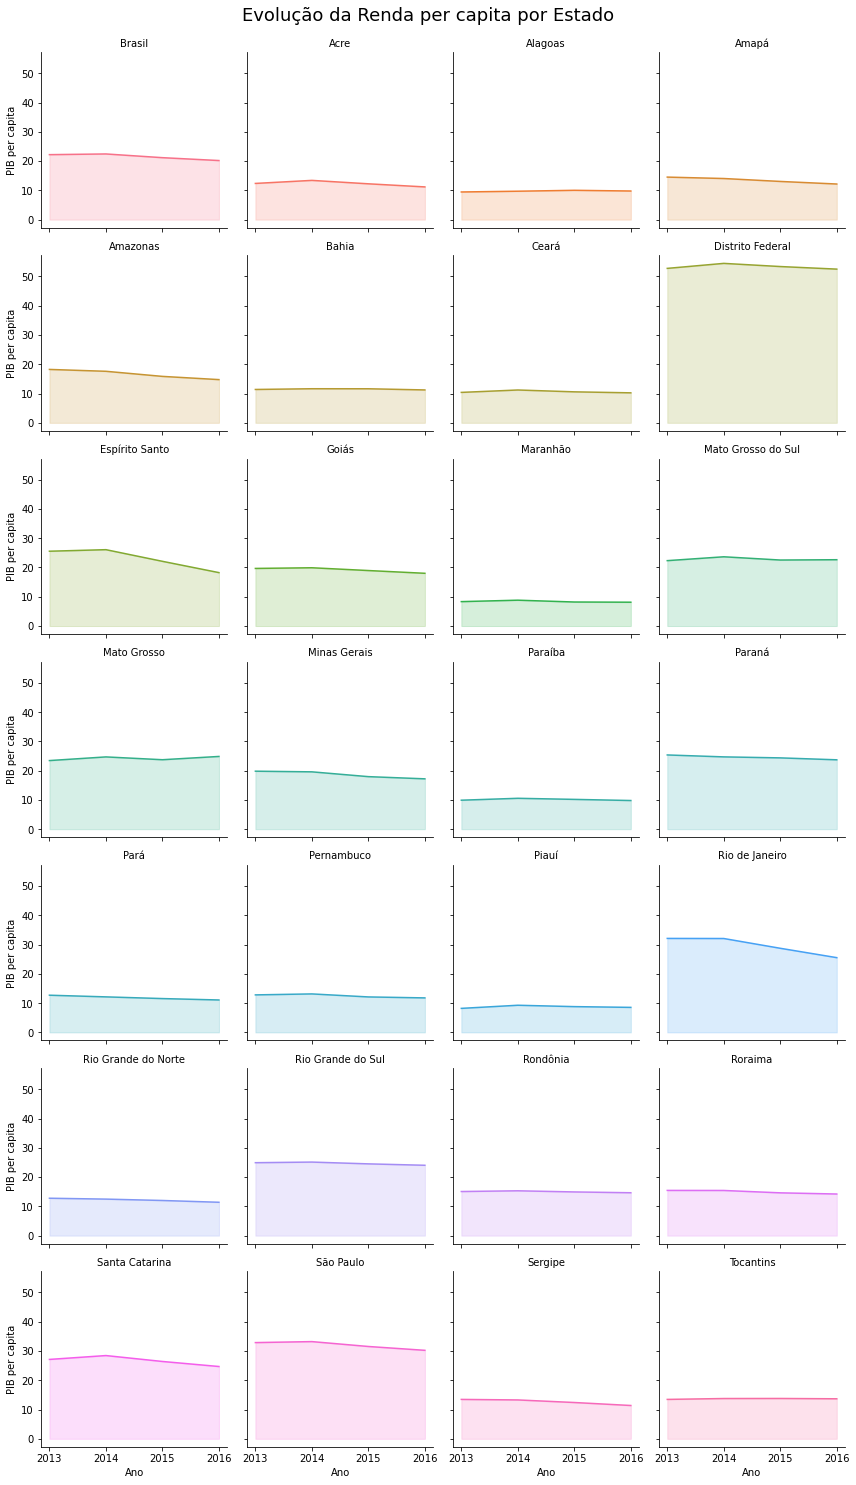

In [8]:
# Sistema de Grids

# Cor Fundo de Fundo
Cor_Fundo = '#f5f5f5'

# Criar o sistema de Grids
Grid_Graficos = sns.FacetGrid( Base_Dados, col='Territorialidades', hue='Territorialidades', col_wrap=4 )

# Adicionar grafico linhas em cada gráfico
Grid_Graficos = Grid_Graficos.map( plt.plot, 'Ano', 'PIB per capita')

# Adiconar uma sombra + Ajuste do titulo
Grid_Graficos = Grid_Graficos.map( plt.fill_between,  'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')

# Filtrar o titulo
Grid_Graficos = Grid_Graficos.set_titles('{col_name}')

# Adicionar um subtitulo
Grid_Graficos = Grid_Graficos.fig.suptitle('Evolução da Renda per capita por Estado', fontsize=18)

# Ajustando
plt.subplots_adjust(top=0.95)